In [16]:
!pip install seaborn
!pip install scikit-learn

     |████████████████████████████████| 22.2 MB 1.3 MB/s             
     |████████████████████████████████| 309 kB 43.8 MB/s            


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Exploration

In [2]:
#Data importation
df = pd.read_csv("dataset.csv")

In [3]:
#the 10 first row
df.head(10)

,Name_domain,Product_name,Region,Country,Average_rating,Number_of_rates,Price,Type
0,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose
1,Château de Lavagnac,Bordeaux 2015,Bordeaux,France,3.6,75,4.10,Red
2,Château de Millet,Colombard - Ugni Blanc 2022,Côtes de Gascogne,France,3.6,759,4.49,White
3,Camina,Chardonnay - Viura 2021,La Mancha,Spain,3.6,25,4.50,White
4,Vinovalie,Les Blousons Noirs Malbec 2020,Cahors,France,3.6,250,4.50,Red
5,Château de Callac,Graves Rouge 2011,Graves,France,3.6,218,4.50,Red
6,Camina,Tempranillo Rosé 2018,La Mancha,Spain,3.3,186,4.50,Rose
7,Duchesse de Berry,Cuvée Prestige Bordeaux 2020,Bordeaux,France,3.3,719,4.71,Red
8,Domaine du Tariquet,Côtes De Gascogne Classic 2018,Côtes de Gascogne,France,3.5,1261,4.77,White
9,Château Haut Bernin,Bordeaux 2015,Bordeaux,France,3.3,64,4.90,Red


In [4]:
#the df tail
df.tail()

,Name_domain,Product_name,Region,Country,Average_rating,Number_of_rates,Price,Type
30013,Bollinger,R.D Extra Brut Champagne (Récemment Dégorgé) 1999,Champagne,France,4.7,172,498.00,Sparkling
30014,Veuve Clicquot,La Grande Dame Brut Rosé Champagne 1998,Champagne,France,4.7,215,498.30,Sparkling
30015,Château Certan de May,Pomerol 1928,Pomerol,France,4.3,4777,499.95,Red
30016,Château Lafite Rothschild,Carruades de Lafite Pauillac 2016,Pauillac,France,4.3,190,500.00,Red
30017,Château Haut-Brion,Pessac-Léognan (Premier Grand Cru Classé) 2013,Pessac-Léognan,France,4.5,521,500.00,Red


In [5]:
#the dataframe shape
df.shape

(30018, 8)

In [6]:
#The df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30018 entries, 0 to 30017
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name_domain      30017 non-null  object 
 1   Product_name     30018 non-null  object 
 2   Region           30018 non-null  object 
 3   Country          30013 non-null  object 
 4   Average_rating   30018 non-null  float64
 5   Number_of_rates  30018 non-null  int64  
 6   Price            30018 non-null  float64
 7   Type             30018 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [7]:
# the df number of  columns 
col=df.columns
col_n=len(col)
print(f"we have {col_n} columns")

we have 8 columns


In [8]:
#The df describetion
df.describe()

,Average_rating,Number_of_rates,Price
count,30018.000000,30018.000000,30018.000000
mean,3.979569,540.673363,57.663781
std,0.266151,2145.275221,76.891363
min,2.500000,25.000000,4.090000
25%,3.800000,63.000000,16.450000
50%,4.000000,153.500000,28.080000
75%,4.200000,415.750000,60.852500
max,4.800000,127550.000000,500.000000


# Plotting some graph

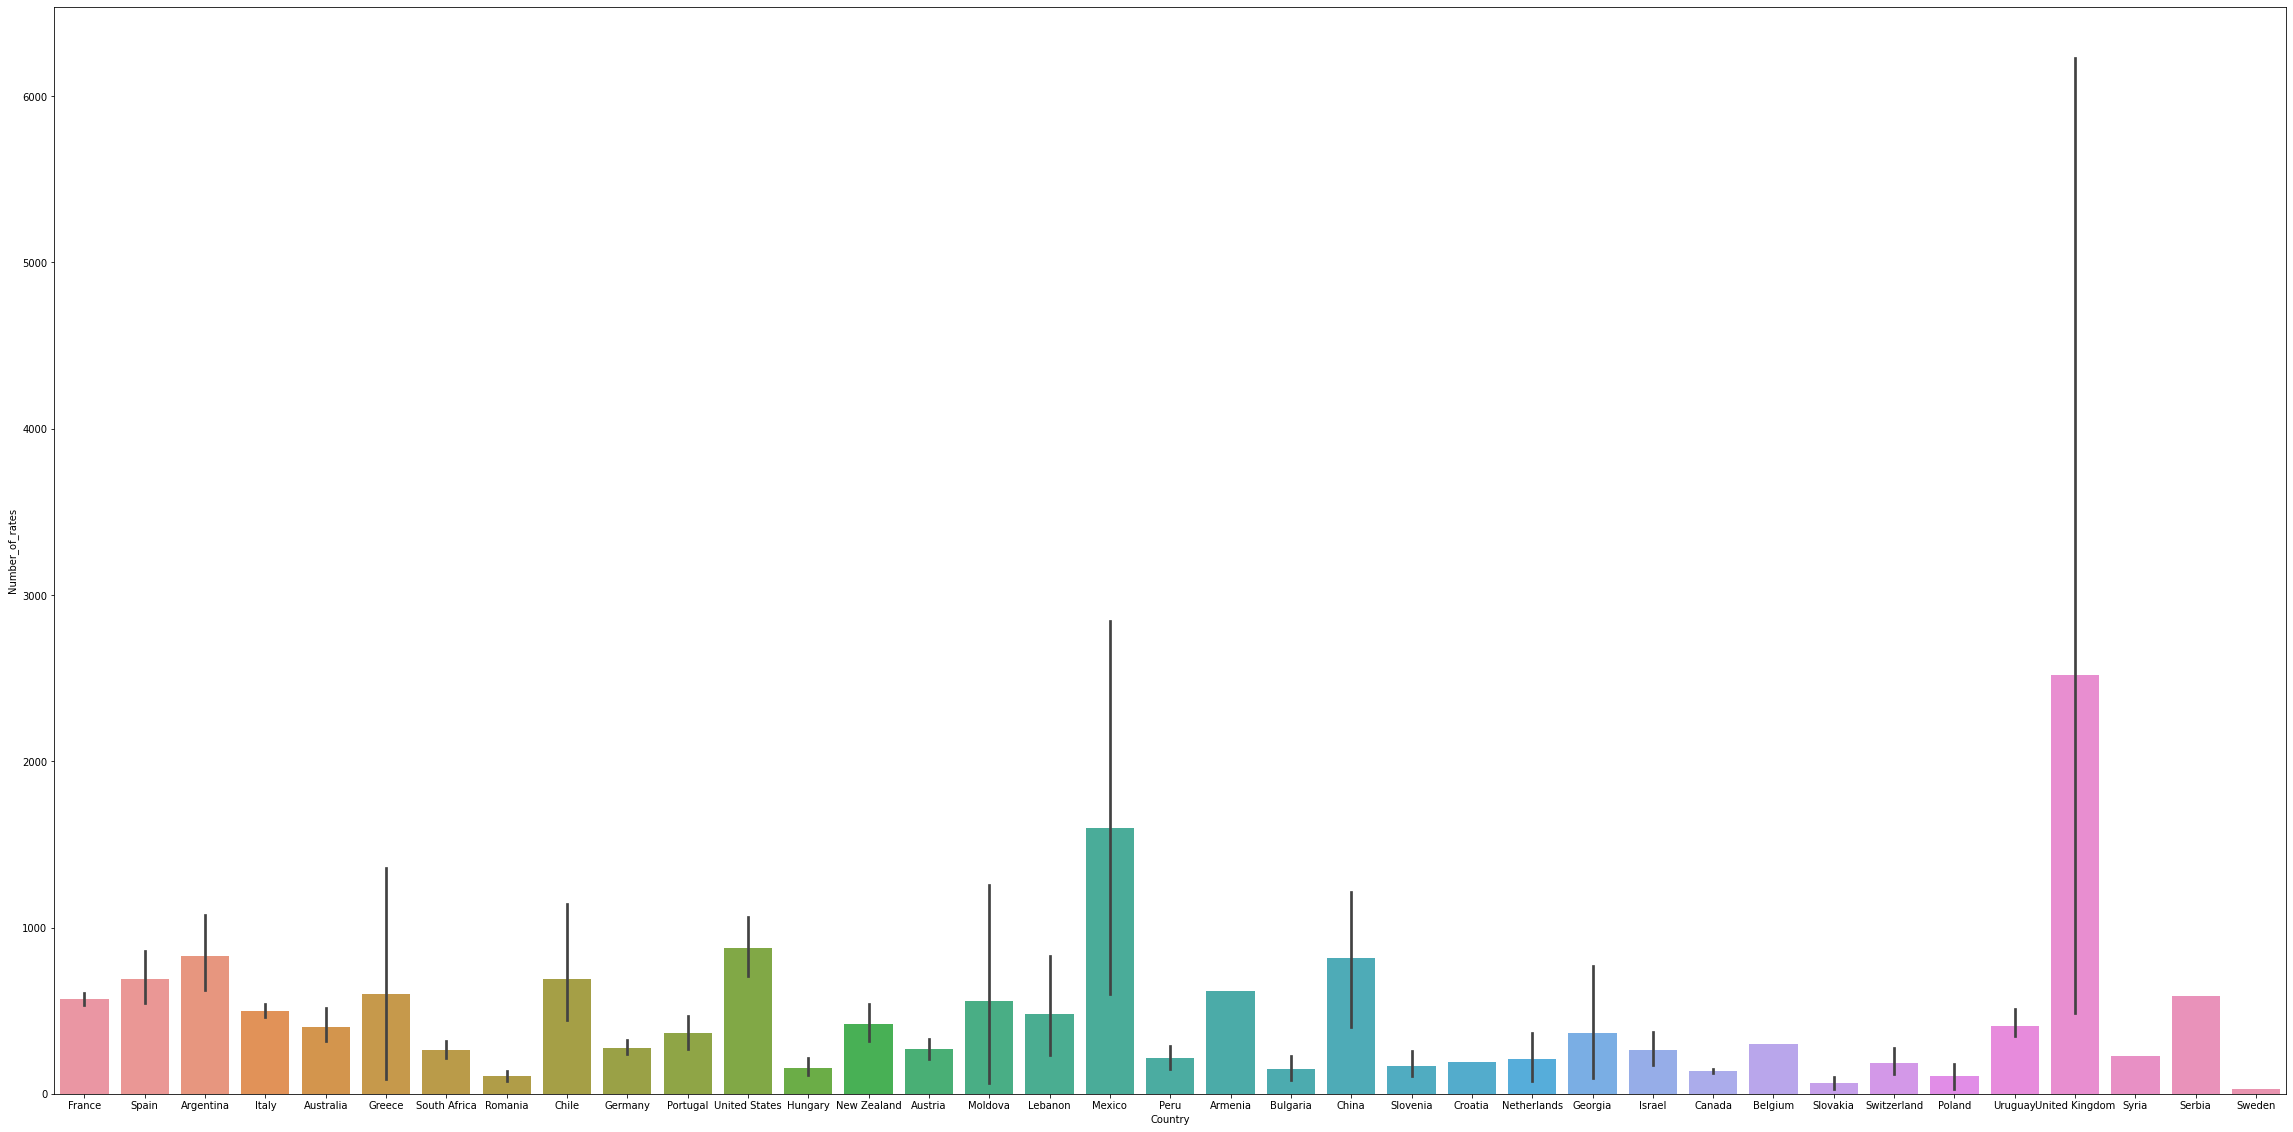

In [9]:
#Contry per rating

def cont_rat(df):
    plt.figure(figsize=(40,20))
    sns.barplot(x = "Country",
                 y = 'Number_of_rates',
                 data = df)
    plt.show()
    
cont_rat(df)

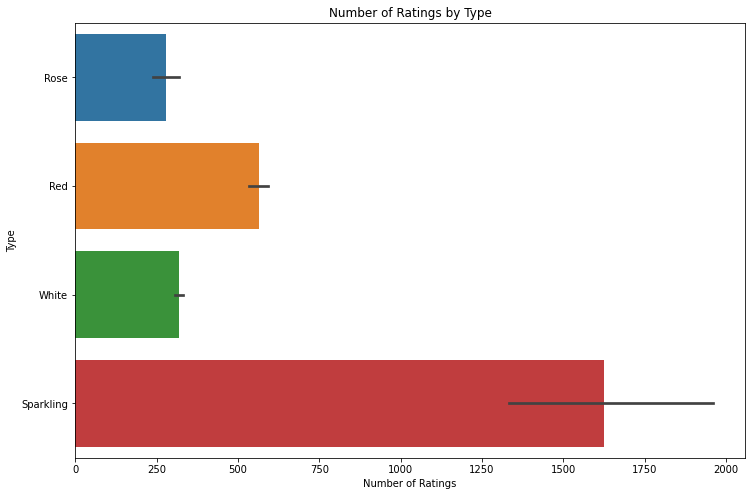

In [10]:
#product per rating

def cont_rat(df):
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.barplot(x="Number_of_rates", y="Type", data=df, orient="h")
    plt.xlabel('Number of Ratings')
    plt.ylabel('Type')
    plt.title('Number of Ratings by Type')
    plt.show()
cont_rat(df)  

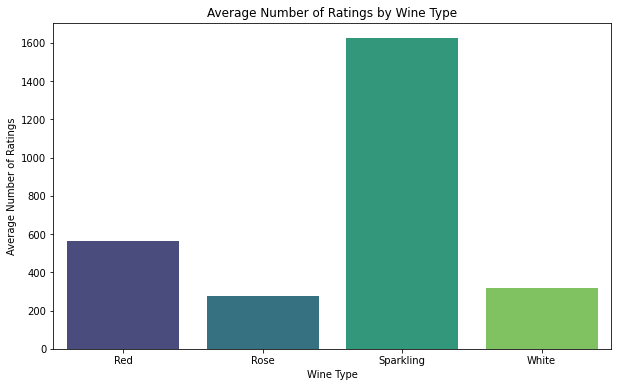

In [11]:
# Group by Type and calculate the average number of ratings
avg_ratings_by_type = df.groupby('Type')['Number_of_rates'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Number_of_rates', data=avg_ratings_by_type, palette='viridis')
plt.xlabel('Wine Type')
plt.ylabel('Average Number of Ratings')
plt.title('Average Number of Ratings by Wine Type')
plt.show()

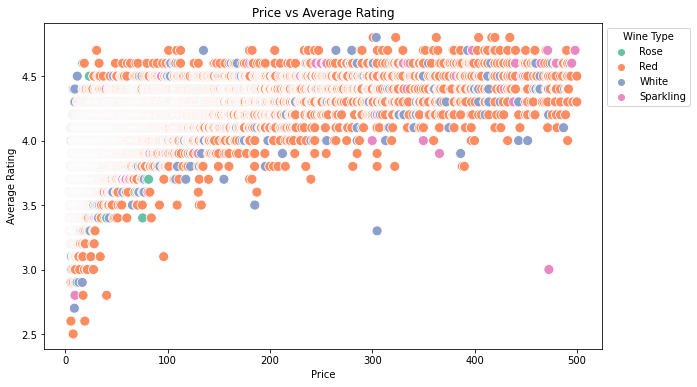

In [12]:
# Convert 'Price' to numeric (assuming it's a string)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Average_rating', data=df, hue='Type', palette='Set2', s=100)
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.title('Price vs Average Rating')
plt.legend(title='Wine Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


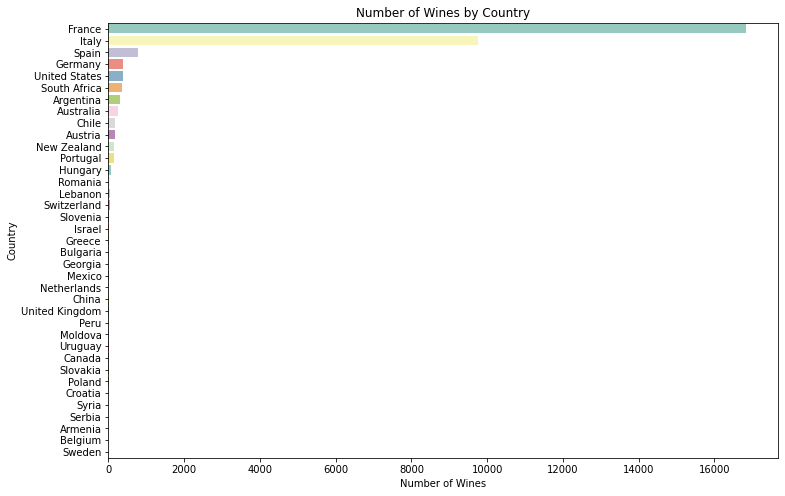

In [15]:
#Count Plot - Number of Wines by Country
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df, palette='Set3', order=df['Country'].value_counts().index)
plt.xlabel('Number of Wines')
plt.ylabel('Country')
plt.title('Number of Wines by Country')
plt.show()


In [26]:
# Selecting features and target variable
X = df[['Average_rating', 'Number_of_rates']]
y = df['Price']

In [27]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicting on the test set
y_pred = model.predict(X_test)


In [30]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [31]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3583.1317294539967
Root Mean Squared Error: 59.859266028360196
R-squared: 0.3775716629042798


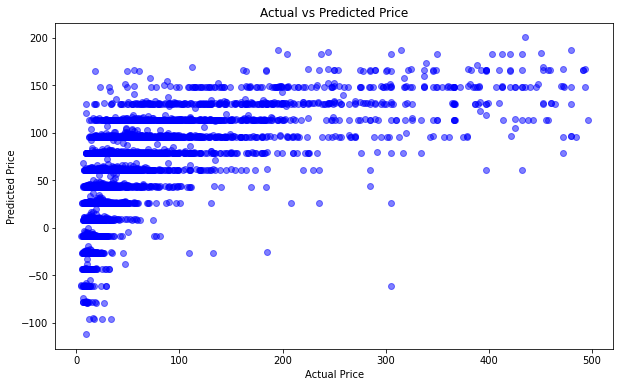

In [32]:
# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

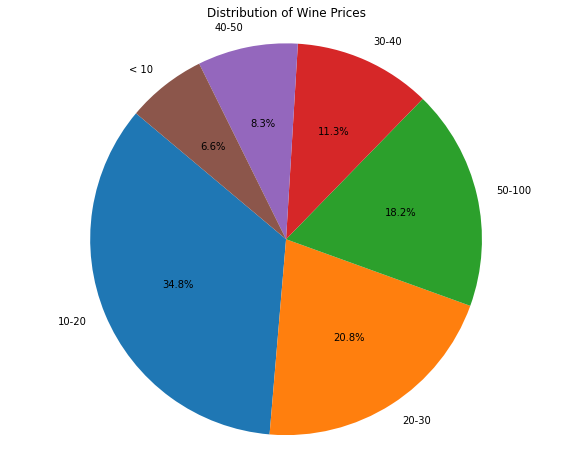

In [33]:
prices = df['Price']

# Define bins/categories for prices
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['< 10', '10-20', '20-30', '30-40', '40-50', '50-100']

# Use pandas cut to categorize prices into bins
price_categories = pd.cut(prices, bins=bins, labels=labels, right=False)

# Count the number of wines in each price category
price_counts = price_categories.value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Prices')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [35]:
!pip install svgwrite

     |████████████████████████████████| 67 kB 1.3 MB/s             


In [38]:
import svgwrite
new_data = {
    'Average_rating': np.linspace(3.0, 4.0, 50),  # Example range of average ratings
    'Number_of_rates': np.repeat(500, 50)  # Example constant number of rates
}
X_new = pd.DataFrame(new_data)

# Predicting prices for new data
y_new_pred = model.predict(X_new)
# Saving the plot as SVG
svg_filename = 'model_prediction.svg'
plt.savefig(svg_filename, format='svg')
plt.close()

print(f'SVG file saved as {svg_filename}')

SVG file saved as model_prediction.svg


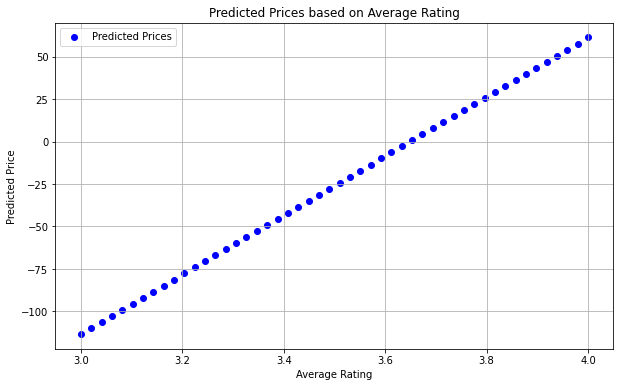

In [39]:
# Plotting the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(X_new['Average_rating'], y_new_pred, color='blue', label='Predicted Prices')
plt.xlabel('Average Rating')
plt.ylabel('Predicted Price')
plt.title('Predicted Prices based on Average Rating')
plt.grid(True)
plt.legend()